## Pandas tutorial

In [1]:
#imported libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Create a datafram, sales from a csv file all_sales
sales = pd.read_csv('all_sales.csv')

In [3]:
#Checking and Validating
sales.info()
sales.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Cheking the total number of blank rows
sales.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
#Displays the null values of the Data column
# isna() before dropna()
sales[sales['Order ID'].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# isna() before dropna()
sales = sales.dropna()
sales.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
sales.info()
sales.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


#### 1. Which month had the highest sale? What is the monthly sales trend?

In [8]:
#Create a month column from order date
sales['Month'] = sales['Order Date'].str[0:2]
sales.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04


In [9]:
#Create Or_dump DataFrame to check the "Or's" in the Month Column
Or_dump = sales[sales['Month'] == "Or"]
Or_dump.head

<bound method NDFrame.head of         Order ID  Product  Quantity Ordered  Price Each  Order Date  \
519     Order ID  Product  Quantity Ordered  Price Each  Order Date   
1149    Order ID  Product  Quantity Ordered  Price Each  Order Date   
1155    Order ID  Product  Quantity Ordered  Price Each  Order Date   
2878    Order ID  Product  Quantity Ordered  Price Each  Order Date   
2893    Order ID  Product  Quantity Ordered  Price Each  Order Date   
...          ...      ...               ...         ...         ...   
185164  Order ID  Product  Quantity Ordered  Price Each  Order Date   
185551  Order ID  Product  Quantity Ordered  Price Each  Order Date   
186563  Order ID  Product  Quantity Ordered  Price Each  Order Date   
186632  Order ID  Product  Quantity Ordered  Price Each  Order Date   
186738  Order ID  Product  Quantity Ordered  Price Each  Order Date   

        Purchase Address Month  
519     Purchase Address    Or  
1149    Purchase Address    Or  
1155    Purchase A

In [10]:
#Remove "Or's" from the Month Column
sales = sales[sales['Month'] != 'Or']

In [11]:
Or_dump = sales[sales['Month'] == "Or"]
Or_dump.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [12]:
#Convert data type of month column from object to integer
sales['Month'] = sales['Month'].astype('int32')

In [13]:
sales.info()
sales.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [14]:
#Convert Quantity Ordered and Price Each columns to the correct data type
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'])
sales['Price Each'] = pd.to_numeric(sales['Price Each'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


In [15]:
#Add Sales Column
sales['sales'] = sales['Quantity Ordered']*sales['Price Each']
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


1. Which month had the highest sale? What is the monthly sales trend?
2. Which product sold the most? How are the other products doing?

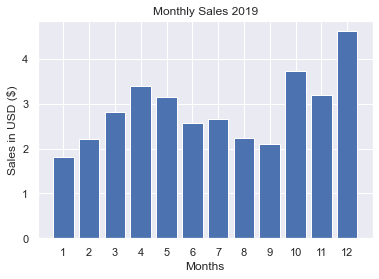

In [28]:
sns.set()

months = range(1,13)
plt.bar(months, sales.groupby(['Month']).sum()['sales']/1000000)

plt.title('Monthly Sales 2019')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.xticks(months)
plt.show()

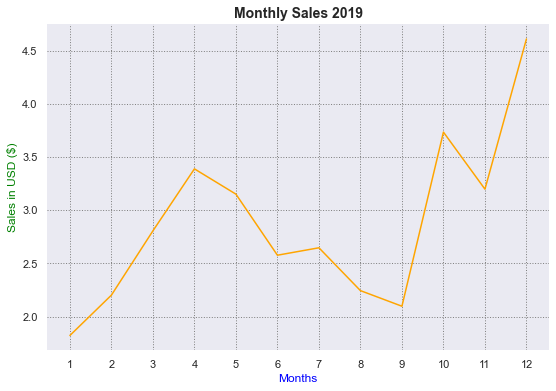

In [29]:
fig = plt.figure(figsize = (9,6))

months = range(1,13)
plt.plot(months, sales.groupby(['Month']).sum()['sales']/1000000, color = 'orange')

plt.title('Monthly Sales 2019', fontsize = 14, fontweight = 'bold')
plt.ylabel('Sales in USD ($)', fontsize = 12, color = 'green')
plt.xlabel('Months', fontsize = 12, color = 'blue')
plt.xticks(months)
plt.grid(True, color = 'grey', linestyle=':')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

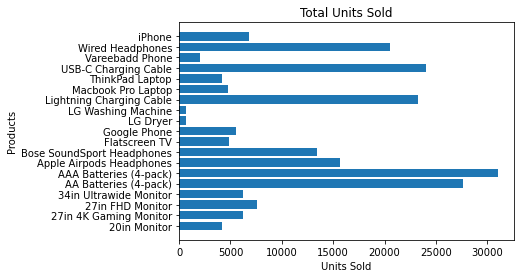

In [18]:
product_group = sales.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.barh(products, quantity_ordered)

plt.title('Total Units Sold', fontsize = 12)
plt.ylabel('Products')
plt.xlabel('Units Sold')
plt.yticks(products)
plt.show()

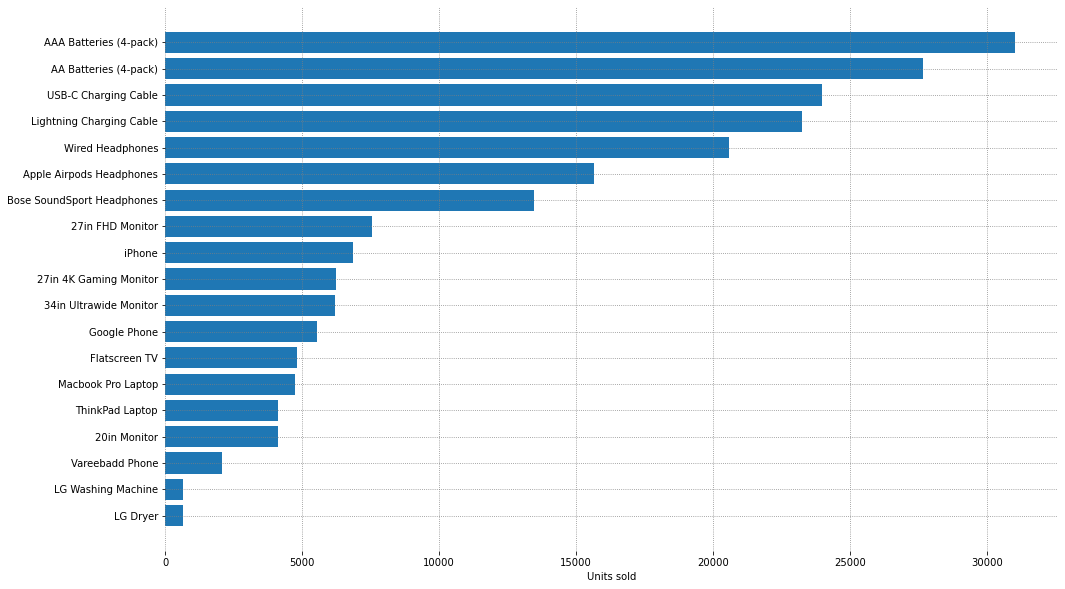

In [19]:
fig = plt.figure(figsize = (16,10))

product_group = sales.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

sort_sum = quantity_ordered.sort_values(ascending=True)
sort_sum = pd.DataFrame(sort_sum)
sort_sum = sort_sum.reset_index()

product = sort_sum['Product']
quantity = sort_sum['Quantity Ordered']

plt.barh(product, quantity)

plt.xlabel('Units sold')
plt.yticks(product, size = 10)

plt.grid(True, color = 'grey', linestyle=':')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

In [20]:
product_group = sales.groupby('Product')
product_group.sum()

,Quantity Ordered,Price Each,Month,sales
Product,,,,
20in Monitor,4129,451068.99,29336,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56
27in FHD Monitor,7550,1125974.93,52558,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43
Flatscreen TV,4819,1440000.00,34224,1445700.00


In [21]:
hphone = sort_sum[sort_sum['Product'].isin(['Apple Airpods Headphones','Bose SoundSport Headphones','Wired Headphones'])]
hphone

,Product,Quantity Ordered
12,Bose SoundSport Headphones,13457
13,Apple Airpods Headphones,15661
14,Wired Headphones,20557


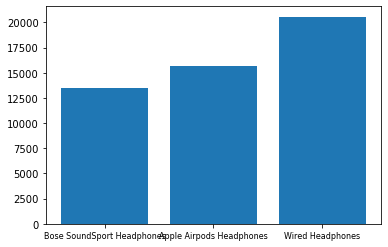

In [22]:
h_product = hphone['Product']
h_quantity = hphone['Quantity Ordered']

plt.bar(h_product,h_quantity)
plt.xticks(h_product, size = 8)

plt.show()

In [23]:
phone = sort_sum[sort_sum['Product'].isin(['Vareebadd Phone','Google Phone','iPhone'])]
phone

,Product,Quantity Ordered
2,Vareebadd Phone,2068
7,Google Phone,5532
10,iPhone,6849


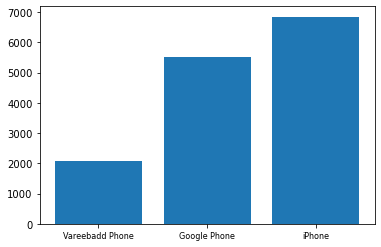

In [24]:
p_product = phone['Product']
p_quantity = phone['Quantity Ordered']

plt.bar(p_product,p_quantity)
plt.xticks(p_product, size = 8)

plt.show()

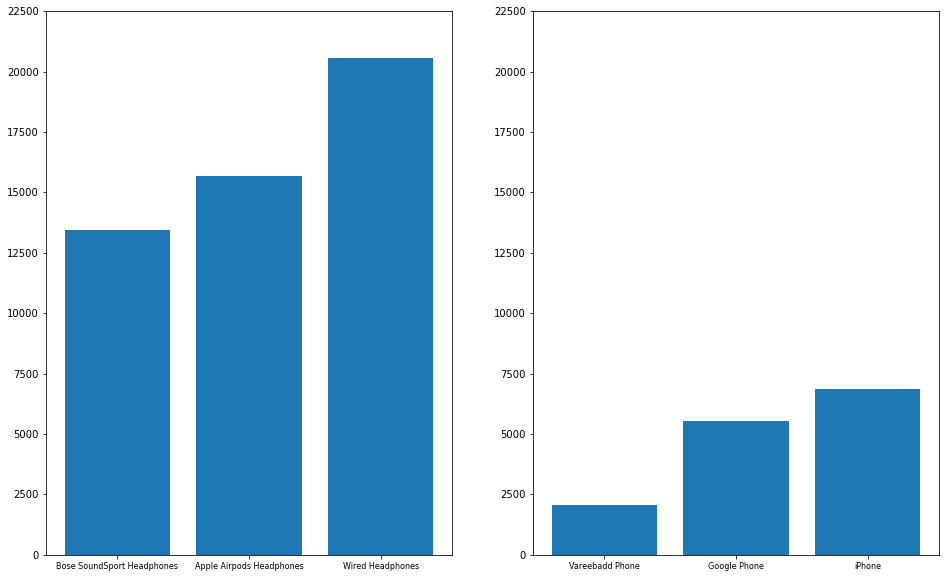

In [25]:
#BAR
fig = plt.figure(figsize = (16,10))
#plot 1
h_product = hphone['Product']
h_quantity = hphone['Quantity Ordered']

plt.subplot(1,2,1)

plt.bar(h_product,h_quantity)
plt.xticks(h_product, size = 8)
plt.ylim(0,22500)

#plot 2
p_product = phone['Product']
p_quantity = phone['Quantity Ordered']

plt.subplot(1,2,2)

plt.bar(p_product,p_quantity)
plt.xticks(p_product, size = 8)
plt.ylim(0,22500)

plt.show()

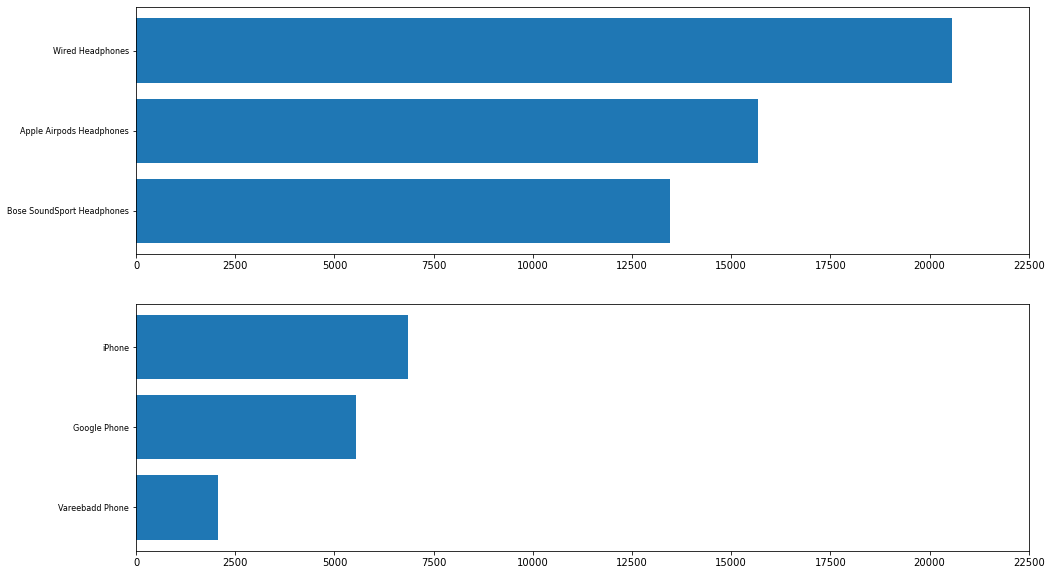

In [26]:
#BARH
fig = plt.figure(figsize = (16,10))
#plot 1
h_product = hphone['Product']
h_quantity = hphone['Quantity Ordered']

plt.subplot(2,1,1)

plt.barh(h_product,h_quantity)
plt.yticks(h_product, size = 8)
plt.xlim(0,22500)

#plot 2
p_product = phone['Product']
p_quantity = phone['Quantity Ordered']

plt.subplot(2,1,2)

plt.barh(p_product,p_quantity)
plt.yticks(p_product, size = 8)
plt.xlim(0,22500)

plt.show()

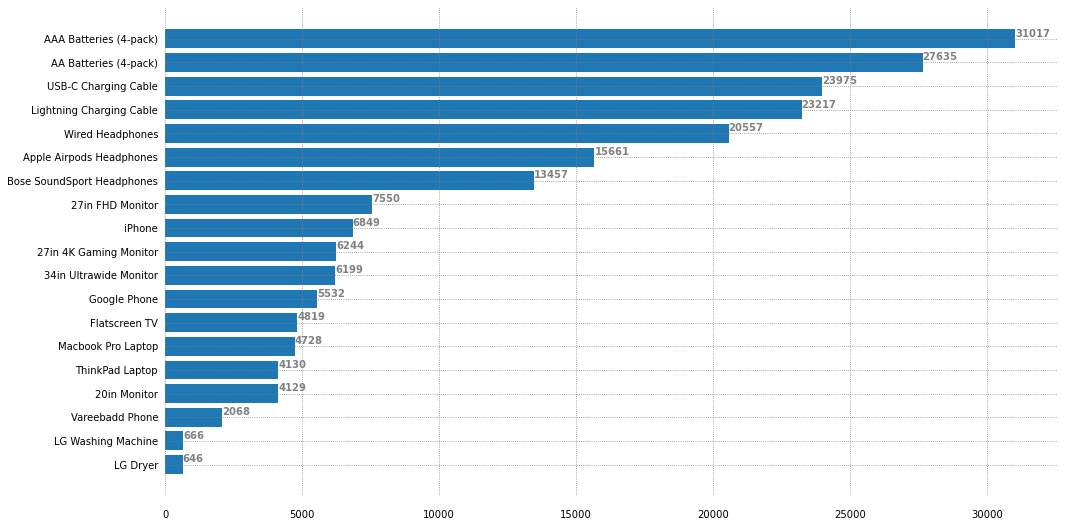

In [27]:
#BARH
fig, ax = plt.subplots(figsize = (16,9))

product_group = sales.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

sort_sum = quantity_ordered.sort_values(ascending=True)
sort_sum = pd.DataFrame(sort_sum)
sort_sum = sort_sum.reset_index()

product = sort_sum['Product']
quantity = sort_sum['Quantity Ordered']

ax.barh(product,quantity)

#Add y values to bars
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5,
           str(round((i.get_width()), 2)),
           fontsize = 10, fontweight = 'bold',
           color = 'grey')
    
#Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

#Add x, y gridlines
ax.grid(visible = True, color = 'grey', linestyle = ':')

#Add padding or spaces between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.xaxis.set_tick_params(pad = 10)

#Remoce axes spines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
plt.show()